# **ZMSI_Lab_4**
Tworzenie generatorów danych obrazowych

$\color{red}{Uwaga:}$

1- proszę pamiętać o zmianie słowa ***Album*** w nazwie pliku i uzupełnieniu swoich danych powyżej tego pola;

2- kluczowe polecenia proszę opatrzyć komentarzem;

3- wnioski, pod zadaniem, wpisujemy w polu tekstowym.

In [ ]:
# Podpisywanie pracy
NN = input("Podaj Imię i Nazwisko: ")
ALBUM = input("Podaj numer albumu: ")

Podaj Imię i Nazwisko: Kacper Gąsowski
Podaj numer albumu: 154845


In [ ]:
# Ocena pracy. Proszę nie zmieniać komórek z kodem pomocniczym do oceny.
punkty = []
max = int(25)

### **Zad 4.1.** Na bazie klasy *ImageDataGenerator* biblioteki **Keras** utwórz własne generatory danych obrazowych implementujące funkcje dodawania do obrazów losowego szumu:
*   o rozkładzie jednorodnym,
*   o rozkładzie normalnym,
*   typu sól i pieprz.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
from PIL import Image
import os
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
import cv2
import matplotlib.pyplot as plt


# Funkcja dodająca szum typu sól i pieprz
def add_salt_and_pepper_noise(image, salt_prob=0.03, pepper_prob=0.03):
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = np.ceil(salt_prob * total_pixels)
    num_pepper = np.ceil(pepper_prob * total_pixels)

    # Dodanie białych pikseli
    coords_salt = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords_salt[0], coords_salt[1], :] = 1

    # Dodanie czarnych pikseli
    coords_pepper = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords_pepper[0], coords_pepper[1], :] = 0

    return noisy_image

# Klasa niestandardowego generatora danych
class CustomImageDataGenerator(ImageDataGenerator):
    def __init__(self, noise_type=None, **kwargs):
        super().__init__(**kwargs)
        self.noise_type = noise_type

    def apply_noise(self, image):
        if self.noise_type == 'salt_and_pepper':
            return add_salt_and_pepper_noise(image, salt_prob=0.03, pepper_prob=0.03)
        return image

    def flow_from_directory(self, directory, **kwargs):
        batches = super().flow_from_directory(directory, **kwargs)
        processed_images = 0
        for batch_x, batch_y in batches:
            noisy_batch_x = np.array([self.apply_noise(x) for x in batch_x])
            yield noisy_batch_x, batch_y
            processed_images += len(batch_x)
            if processed_images >= 10:
                break

# Przykład użycia z obrazami z folderu
data_dir = '/content/drive/My Drive/KUL/Obrazy/Images'

# Tworzenie generatora z szumem typu sól i pieprz
salt_pepper_noise_datagen = CustomImageDataGenerator(noise_type='salt_and_pepper', rescale=1./255)

# Parametry generatora
generator = salt_pepper_noise_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),  # Rozmiar obrazów
    batch_size=5,  # Liczba obrazów przetwarzanych jednocześnie
    class_mode='binary'
)

# Pobieranie i wyświetlanie próbek z szumem
total_images = 0
for noisy_images, labels in generator:
    for i in range(len(noisy_images)):
        if total_images < 10:
            # Wyświetlenie przykładowego obrazu z szumem
            plt.imshow(array_to_img(noisy_images[i]))
            plt.show()
            total_images += 1
        else:
            break
    if total_images >= 10:
        break  # Zatrzymanie po wyświetleniu 10 obrazów

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Maksymalna wartość punktów za Zad 4.1: 15
punkty.append(15)

### **Zad 4.2.** Na bazie klasy *ImageDataGenerator* biblioteki **Keras** utwórz własne generatory danych obrazowych implementujące funkcje dodawania wybranych zakłóceń (np. losowo wybranych czarnych linii).

Found 20580 images belonging to 120 classes.


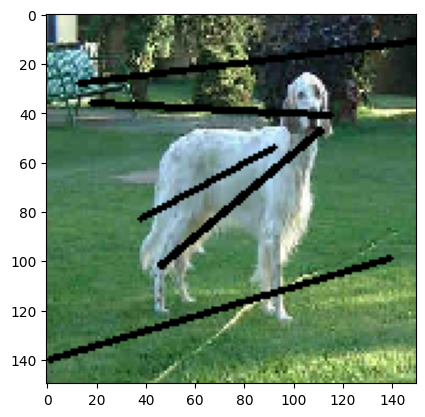

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
import matplotlib.pyplot as plt

# Funkcja dodająca losowe czarne linie
def add_random_black_lines(image, num_lines=5):
    noisy_image = np.copy(image)
    height, width, _ = image.shape

    for _ in range(num_lines):
        # Wybranie losowo dwóch punktów na obrazie
        x1, y1 = np.random.randint(0, width), np.random.randint(0, height)
        x2, y2 = np.random.randint(0, width), np.random.randint(0, height)

        # Rysowanie czarnej linii między wybranymi punktami
        cv2.line(noisy_image, (x1, y1), (x2, y2), color=(0, 0, 0), thickness=2)

    return noisy_image

# Klasa niestandardowego generatora danych
class CustomImageDataGeneratorWithLines(ImageDataGenerator):
    def __init__(self, line_type=None, **kwargs):
        super().__init__(**kwargs)
        self.line_type = line_type

    def apply_lines(self, image):
        if self.line_type == 'random_black_lines':
            return add_random_black_lines(image)
        return image

    def flow_from_directory(self, directory, **kwargs):
        batches = super().flow_from_directory(directory, **kwargs)
        processed_images = 0
        for batch_x, batch_y in batches:
            noisy_batch_x = np.array([self.apply_lines(x) for x in batch_x])
            yield noisy_batch_x, batch_y
            processed_images += len(batch_x)
            if processed_images >= 10:  # Zatrzymanie po przetworzeniu 10 obrazów
                break

# Przykład użycia z obrazami z folderu
data_dir = '/content/drive/My Drive/KUL/Obrazy/Images'

# Tworzenie generatora z zakłóceniem w postaci losowych czarnych linii
black_lines_datagen = CustomImageDataGeneratorWithLines(line_type='random_black_lines', rescale=1./255)

# Parametry generatora
generator = black_lines_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),  # Rozmiar obrazów
    batch_size=5,  # Liczba obrazów przetwarzanych jednocześnie
    class_mode='binary'
)

# Pobieranie i wyświetlanie próbek z losowymi czarnymi liniami
total_images = 0
for noisy_images, labels in generator:
    for i in range(len(noisy_images)):
        if total_images < 10:
            # Wyświetlenie przykładowego obrazu z zakłóceniami
            plt.imshow(array_to_img(noisy_images[i]))
            plt.show()
            total_images += 1
        else:
            break
    if total_images >= 10:
        break  # Zatrzymanie po wyświetleniu 10 obrazów


In [ ]:
# Maksymalna wartość punktów za Zad 4.2: 10
punkty.append(10)

In [ ]:
razem = sum(punkty)
razem_pr = razem/max
if razem_pr >= 0.90:
  ocena = 5
elif razem_pr >= 0.80:
  ocena = 4.5
elif razem_pr >= 0.70:
  ocena = 4
elif razem_pr >= 0.60:
  ocena = 3.5
elif razem_pr >= 0.50:
  ocena = 3
else:
  ocena = 2

print("Punktacja za kolejne zadania: ", punkty)
print("Suma punktów: ", razem)
print("Udział procentowy: ", razem_pr*100, "%")
print("Ocena: ", ocena)

Punktacja za kolejne zadania:  [15, 10]
Suma punktów:  25
Udział procentowy:  100.0 %
Ocena:  5
